# **Image Classifier**

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import os

In [ ]:
# Import needed libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import Adam
from keras import optimizers
from tensorflow.keras.preprocessing import image

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [ ]:
labels = ['cats', 'dogs']
img_size = 64

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_data('/content/drive/MyDrive/Datasets/Cats&Dogs/data/cats_dogs2/train')
val = get_data('/content/drive/MyDrive/Datasets/Cats&Dogs/data/cats_dogs2/test')

<ipython-input-4-d54b354e66b3>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


Text(0.5, 1.0, 'cats')

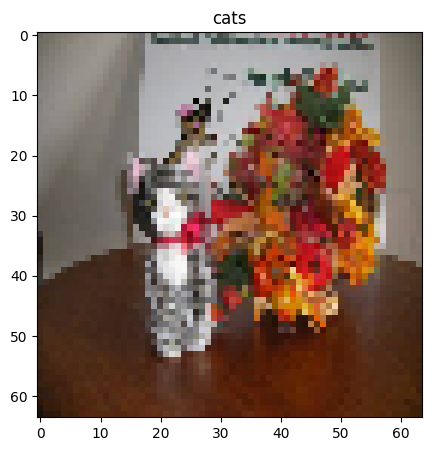

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[5][0])
plt.title(labels[train[0][1]])

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening. ZCA Whitening is an image preprocessing method that leads to a transformation of data such that the covariance matrix is the identity matrix, leading to decorrelated features.
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=(64, 64, 3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [ ]:
opt = Adam(learning_rate=0.00001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 100 , validation_data = (x_val, y_val))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


57/57 [==============================] - 19s 317ms/step - loss: 0.6935 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5200
Epoch 2/100
57/57 [==============================] - 20s 345ms/step - loss: 0.6927 - accuracy: 0.5083 - val_loss: 0.6925 - val_accuracy: 0.5100
Epoch 3/100
57/57 [==============================] - 14s 241ms/step - loss: 0.6915 - accuracy: 0.5167 - val_loss: 0.6923 - val_accuracy: 0.5150
Epoch 4/100
57/57 [==============================] - 16s 276ms/step - loss: 0.6887 - accuracy: 0.5261 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 5/100
57/57 [==============================] - 18s 310ms/step - loss: 0.6881 - accuracy: 0.5389 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 6/100
57/57 [==============================] - 14s 251ms/step - loss: 0.6862 - accuracy: 0.5533 - val_loss: 0.6901 - val_accuracy: 0.5150
Epoch 7/100
57/57 [==============================] - 15s 259ms/step - loss: 0.6859 - accuracy: 0.5450 - val_loss: 0.6893 - val_accuracy: 0.5050
Epoc

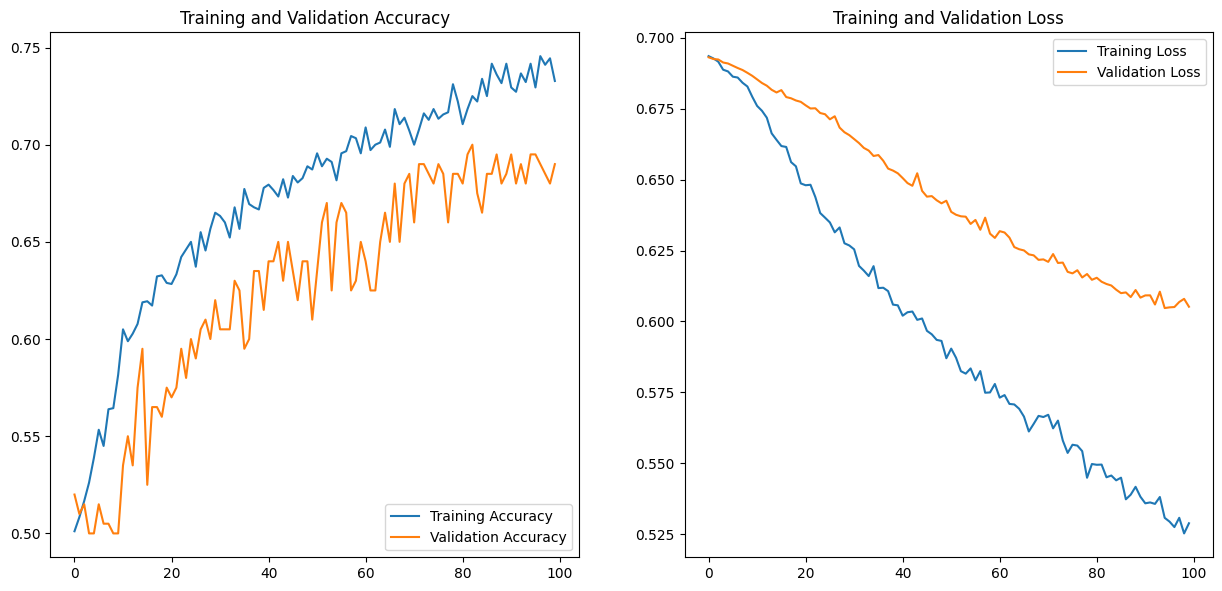

In [ ]:
epochs_range = range(100)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_val, y_val)

print('Test accuracy: {} Test Loss: {}'.format(test_acc*100, test_loss*100))

7/7 [==============================] - 0s 50ms/step - loss: 0.6052 - accuracy: 0.6900
Test accuracy: 68.99999976158142 Test Loss: 60.52027344703674


In [ ]:
y_pred=model.predict(x_val)
y_pred=np.argmax(y_pred,axis=1)
print(y_pred)

7/7 [==============================] - 1s 48ms/step
[0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1
 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1
 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1]


Printing Confusion Matrix
 [[80 20]
 [42 58]]


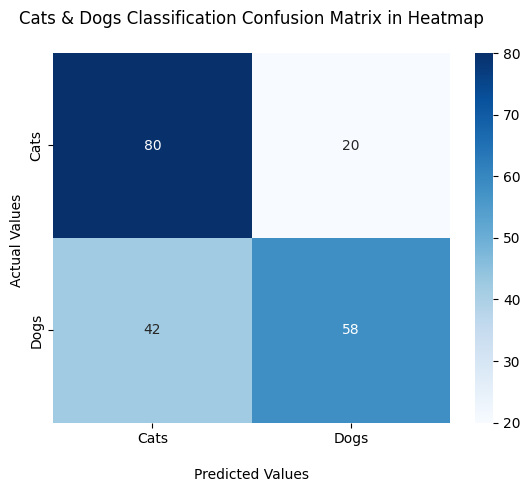

In [ ]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_val,y_pred )

print("Printing Confusion Matrix\n", cf_matrix)

import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Cats & Dogs Classification Confusion Matrix in Heatmap\n');
ax.set_xlabel('\nPredicted Values')
ax.xaxis.set_ticklabels(['Cats','Dogs'])
ax.set_ylabel('Actual Values ');
ax.yaxis.set_ticklabels(['Cats','Dogs'])

## Ticket labels - List must be in alphabetical order

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred, y_val, target_names=labels))

              precision    recall  f1-score   support

        cats       0.80      0.66      0.72       122
        dogs       0.58      0.74      0.65        78

    accuracy                           0.69       200
   macro avg       0.69      0.70      0.69       200
weighted avg       0.71      0.69      0.69       200



# **Improved Image Classifier**

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=(64, 64, 3)))
model2.add(MaxPool2D())

model2.add(Conv2D(32, 3, padding="same", activation="relu"))
model2.add(MaxPool2D())

model2.add(Conv2D(32, 3, padding="same", activation="relu"))
model2.add(MaxPool2D())

model2.add(Conv2D(64, 3, padding="same", activation="relu"))
model2.add(MaxPool2D())
model2.add(Dropout(0.4))

model2.add(Flatten())
model2.add(Dense(128, activation="relu"))
model2.add(Dense(2, activation="softmax"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 32)        

In [ ]:
opt = Adam(learning_rate=0.00001)
model2.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model2.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


57/57 [==============================] - 16s 262ms/step - loss: 0.6977 - accuracy: 0.5056 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/100
57/57 [==============================] - 15s 255ms/step - loss: 0.6929 - accuracy: 0.5106 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/100
57/57 [==============================] - 17s 304ms/step - loss: 0.6928 - accuracy: 0.5183 - val_loss: 0.6931 - val_accuracy: 0.5100
Epoch 4/100
57/57 [==============================] - 15s 260ms/step - loss: 0.6953 - accuracy: 0.5072 - val_loss: 0.6931 - val_accuracy: 0.4800
Epoch 5/100
57/57 [==============================] - 14s 252ms/step - loss: 0.6958 - accuracy: 0.5011 - val_loss: 0.6929 - val_accuracy: 0.5150
Epoch 6/100
57/57 [==============================] - 17s 308ms/step - loss: 0.6930 - accuracy: 0.5083 - val_loss: 0.6925 - val_accuracy: 0.5250
Epoch 7/100
57/57 [==============================] - 16s 276ms/step - loss: 0.6901 - accuracy: 0.5222 - val_loss: 0.6922 - val_accuracy: 0.5200
Epoc

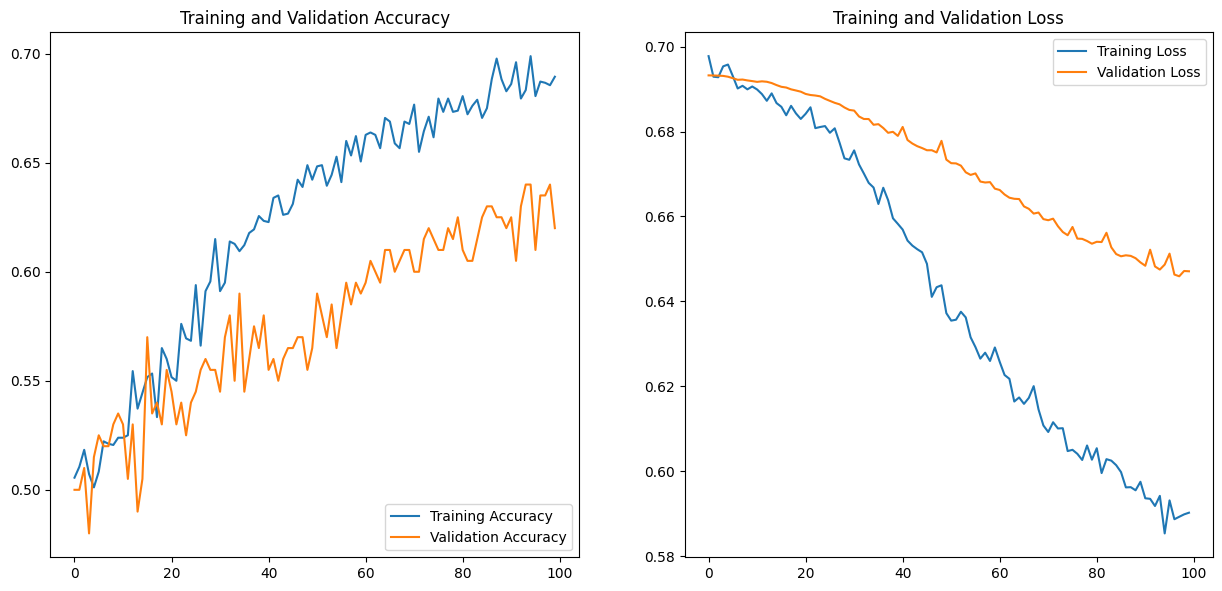

In [ ]:
epochs_range = range(100)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_loss, test_acc = model2.evaluate(x_val, y_val)

print('Test accuracy: {} Test Loss: {}'.format(test_acc*100, test_loss*100))

7/7 [==============================] - 1s 79ms/step - loss: 0.6471 - accuracy: 0.6200
Test accuracy: 62.00000047683716 Test Loss: 64.71061706542969


In [ ]:
# Predict
y_pred = model2.predict(x_val)
y_pred = np.argmax(y_pred,axis=1)
print(y_pred)

7/7 [==============================] - 1s 81ms/step
[0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0
 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1]


Printing Confusion Matrix
 [[56 44]
 [32 68]]


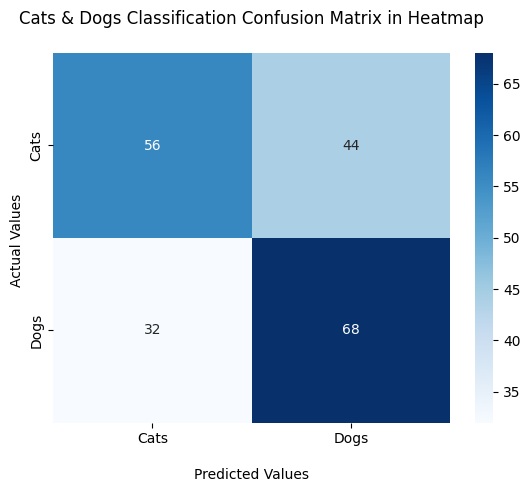

In [ ]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cf_matrix = confusion_matrix(y_val,y_pred )

print("Printing Confusion Matrix\n", cf_matrix)

import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Cats & Dogs Classification Confusion Matrix in Heatmap\n');
ax.set_xlabel('\nPredicted Values')
ax.xaxis.set_ticklabels(['Cats','Dogs'])
ax.set_ylabel('Actual Values ');
ax.yaxis.set_ticklabels(['Cats','Dogs'])

## Ticket labels - List must be in alphabetical order

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred, y_val, target_names=labels))

              precision    recall  f1-score   support

        cats       0.56      0.64      0.60        88
        dogs       0.68      0.61      0.64       112

    accuracy                           0.62       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.63      0.62      0.62       200



In [ ]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)

    if predictions[0][0] > predictions[0][1]:
        return "The uploaded image is a cat."
    else:
        return "The uploaded image is a dog."

# Test new images
image_paths = ['/content/drive/MyDrive/Datasets/Cats&Dogs/data/cats_dogs2/new/dog_prac.jpg']

for img_path in image_paths:
    prediction = predict_image(img_path)
    print(prediction)

1/1 [==============================] - 0s 37ms/step
The uploaded image is a dog.


In [ ]:
model2.save('cats&dogs.h5')

# **Web Application For Image Classification**

In [ ]:
import os
import numpy as np
from keras.preprocessing import image

In [ ]:
from keras.models import load_model
def get_model():
    global model
    model = load_model('cats&dogs.h5') #load a previously trained model and apply another use case.
    print("Model loaded!")

In [ ]:
img_path="/content/drive/MyDrive/Datasets/Cats&Dogs/data/cats_dogs2/Static"

In [ ]:
def load_image(img_path):

    img = image.load_img(img_path, target_size=(64, 64))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    return img_tensor

In [ ]:
def prediction(img_path):
    new_image = load_image(img_path)

    pred = model.predict(new_image)

    print(pred)

    labels=np.array(pred)
    labels[labels>=0.6]=1
    labels[labels<0.6]=0

    print(labels)
    final=np.array(labels)

    if final[0][0]==1:
        return "Cats"
    else:
        return "Dogs"

In [ ]:
from flask import Flask, render_template  #import
from flask import request
app = Flask(__name__)                                    #calling

In [ ]:
get_model()

Model loaded!


In [ ]:
@app.route("/", methods=['GET', 'POST'])
def home():

    return render_template('/content/drive/MyDrive/Datasets/Cats&Dogs/data/cats_dogs2/Template/home.html')

@app.route("/predict", methods = ['GET','POST'])
def predict():

    if request.method == 'POST':

        file = request.files['file']
        filename = file.filename
        file_path = os.path.join('/content/drive/MyDrive/Datasets/Cats&Dogs/data/cats_dogs2/Static', filename)
        file.save(file_path)
        print(filename)
        product = prediction(file_path)
        print(product)

    return render_template('/content/drive/MyDrive/Datasets/Cats&Dogs/data/cats_dogs2/Template/predict.html', product = product, user_image = file_path)            #file_path can or may used at the place of filename


In [ ]:
if __name__ == "__main__":
    app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
